# Algoritmo para extrair características das imagens

In [36]:
import cv2
import os
import numpy as np
import random

def load_images(path_images, fout, dsize):
    # print ('Loading images...')
    archives = os.listdir(path_images)
    images = []
    arq = open('digits/files.txt')
    lines = arq.readlines()
    # print ('Extracting dummy features')
    for line in lines:
        aux = line.split('/')[1]
        image_name = aux.split(' ')[0]
        label = line.split(' ')[1]
        label = label.split('\n')
        for archive in archives:
            if archive == image_name:
                image = cv2.imread(path_images +'/'+ archive, 0)
                rawpixel(image, label[0], fout, dsize)
                #images.append((image, label))
    # print ('Done. Take a look into features.txt')
    return images

#########################################################
# Usa o valor dos pixels como caracteristica
#
#########################################################

def rawpixel(image, label, fout, dsize):
    if not (dsize):
        ## novas dimensoes
        X= 20
        Y= 10
    else:
        X = dsize[0]
        Y = dsize[1]

    image = cv2.resize(image, (X,Y) )
    # cv2.imshow("image", image )
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    fout.write(str(label) +  " ")

    indice = 0
    for i in range(Y):
        #vet= []
            for j in range(X):
                if( image[i][j] > 128):
                    v = 0
                else:
                    v = 1
                    #vet.append(v)

                fout.write(str(indice)+":"+str(v)+" ")
                indice = indice+1

    fout.write("\n")


def features_extraction(dsize=None):
    fout = open("features.txt","w")
    images = load_images('digits/data', fout, dsize)
    fout.close

# Algoritmo para aplicar knn e extrair as métricas - acurácia e matriz confusão

In [115]:
import sys
import numpy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing

def knn(data, k):
        # loads data
        # print ("Loading data...")
        X_data, y_data = load_svmlight_file(data)
        # splits data
        # print ("Spliting data...")
        X_train, X_test, y_train, y_test =  train_test_split(X_data, y_data, test_size=0.25, random_state = 5)

        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()

        # fazer a normalizacao dos dados #######
        scaler = preprocessing.MinMaxScaler()
        X_train = scaler.fit_transform(X_train_dense)
        X_test = scaler.fit_transform(X_test_dense)
        
        # cria um kNN
        neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # print ('Fitting knn')
        neigh.fit(X_train, y_train)

        # predicao do classificador
        # print ('Predicting...')
        y_pred = neigh.predict(X_test)

        # mostra o resultado do classificador na base de teste
        accuracy =  neigh.score(X_test, y_test)
        # print ('Accuracy: ',  accuracy)

        # cria a matriz de confusao
        cm = confusion_matrix(y_test, y_pred)
        print (cm)
        print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))
        return accuracy

In [39]:
result = np.zeros((100,100))
for i in range(10,100,10) :
    for j in range(10,100,10):
        features_extraction((i,j))
        result[i][j] = knn("features.txt")
print(result)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
print(np.amax(result))
np.where(result == np.amax(result))
result[10][15]

0.908


0.908

In [110]:
print(np.amax(result))
np.where(result == np.amax(result))

0.925


(array([20]), array([70]))

In [42]:
np.where(result == np.amax(result))

(array([20]), array([70]))

In [43]:
result[20][70]

0.925

In [44]:
result_1 = np.zeros((100,100))
for i in range(15,25,1) :
    for j in range(65,75,1):
        features_extraction((i,j))
        result_1[i][j] = knn("features.txt")
print(result_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
print(np.amax(result_1))
np.where(result_1 == np.amax(result_1))

0.928


(array([20]), array([69]))

In [116]:
features_extraction((20,69))
knn("features.txt", 1)

[[43  0  0  0  0  1  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 1  2 53  0  0  0  0  1  0  0]
 [ 0  0  0 61  0  0  0  1  0  0]
 [ 0  3  0  0 50  0  0  0  0  0]
 [ 0  0  0  4  0 35  0  0  0  0]
 [ 1  1  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  0  1  0  1  1  1 37  0]
 [ 0  0  0  0  2  0  0  3  0 53]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.86      1.00      0.92        42
           2       1.00      0.93      0.96        57
           3       0.92      0.98      0.95        62
           4       0.96      0.94      0.95        53
           5       0.95      0.90      0.92        39
           6       0.98      0.97      0.97        59
           7       0.88      1.00      0.94        44
           8       1.00      0.88      0.94        42
           9       1.00      0.91      0.95        58

    accuracy                           0.95       500
   macro avg       

0.95

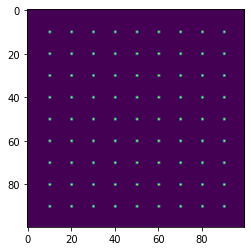

In [107]:
import matplotlib.pyplot as plt
temp = plt.imshow(result)

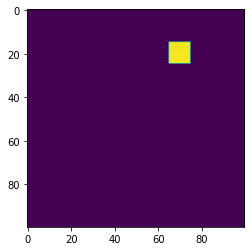

In [109]:
plt.imsave('test.png', result_1)
plt.imshow(result_1)
plt.show()

In [91]:
result.shape

(100, 100)

In [95]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

volume = np.copy(result)

m,n = volume.shape
R,C = np.mgrid[:m,:n]
volume = np.column_stack((C.ravel(),R.ravel(), volume.ravel()))

print(volume)

# Create the x, y, and z coordinate arrays.  We use 
# numpy's broadcasting to do all the hard work for us.
# We could shorten this even more by using np.meshgrid.
x = np.arange(volume.shape[0])[:, None, None]
y = np.arange(volume.shape[1])[None, :, None]
z = np.arange(volume.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(volume.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=c)

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 ...
 [97. 99.  0.]
 [98. 99.  0.]
 [99. 99.  0.]]


IndexError: tuple index out of range

In [99]:
volume = np.random.rand(N, N, N)
print(volume)

[[[0.14076369 0.51326437 0.00183404 0.21423558 0.50140848 0.93052508
   0.73096092 0.98281783]
  [0.81380315 0.39726962 0.5917429  0.37493833 0.64055827 0.96396494
   0.06411723 0.69115132]
  [0.03184287 0.0559682  0.18926005 0.3252333  0.74171664 0.54235107
   0.14690437 0.42803121]
  [0.80413392 0.82401804 0.82082131 0.50889762 0.15907176 0.70395191
   0.73627642 0.63696694]
  [0.5745181  0.51174013 0.43072347 0.24716167 0.98019795 0.02024346
   0.70095509 0.73594105]
  [0.9139419  0.75261496 0.83550102 0.88850673 0.84141196 0.42441184
   0.16470199 0.5559494 ]
  [0.80453366 0.86618337 0.04682526 0.64317127 0.84205831 0.63623555
   0.32247234 0.05453876]
  [0.19058314 0.86958414 0.40822655 0.78340544 0.58800561 0.47918316
   0.71835085 0.61496649]]

 [[0.01482875 0.466771   0.58929767 0.36961807 0.88574271 0.66498113
   0.64004718 0.78086128]
  [0.30436637 0.18563387 0.50027576 0.29400487 0.68744331 0.57011189
   0.73120923 0.0358511 ]
  [0.04247614 0.88334165 0.24968778 0.17252701 0

In [119]:
volume[0][0]

array([0.14076369, 0.51326437, 0.00183404, 0.21423558, 0.50140848,
       0.93052508, 0.73096092, 0.98281783])

In [151]:
from math import floor
def f(x, y):
    matrix = np.zeros((len(x),len(y)))
    print(y)
    for i in x:
        for j in y:
            matrix[i][j] = result[i][j]        
    return matrix

x = np.linspace(0, 99, 10)
y = np.linspace(0, 99, 10)

X, Y = np.meshgrid(x, y)
#print(X[9][9])
Z = f(X, Y)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [22. 22. 22. 22. 22. 22. 22. 22. 22. 22.]
 [33. 33. 33. 33. 33. 33. 33. 33. 33. 33.]
 [44. 44. 44. 44. 44. 44. 44. 44. 44. 44.]
 [55. 55. 55. 55. 55. 55. 55. 55. 55. 55.]
 [66. 66. 66. 66. 66. 66. 66. 66. 66. 66.]
 [77. 77. 77. 77. 77. 77. 77. 77. 77. 77.]
 [88. 88. 88. 88. 88. 88. 88. 88. 88. 88.]
 [99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]]


IndexError: arrays used as indices must be of integer (or boolean) type

In [125]:
x = np.linspace(0,99,10)
print(x)

[ 0. 11. 22. 33. 44. 55. 66. 77. 88. 99.]
